In [1]:
#create reference for CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read CSV file into a dataframe
olympics_path = "resources/athlete_events.csv"

olympics_df = pd.read_csv(olympics_path, low_memory = False)

#print the first 5 rows
olympics_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# use only the Summer Olympics for Analysis
summer_df = olympics_df[olympics_df['Season'] == 'Summer']

In [4]:
#Create variables for the specific host country
host_country = 'Greece'
host_NOC = 'GRE'
host_year = 2004

In [5]:
# create a dataframe for only the UK team in the Summer Olympics
host_df = summer_df[summer_df['NOC'] == host_NOC]

In [6]:
# create a dataframe for the UK team in the Summer Olympics grouped by Games. 
games_df_host = host_df.groupby('Games').agg({'Medal': ['count']})

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
games_df_host['gold_medals'] = host_df[host_df['Medal'] == 'Gold'].groupby('Games').agg({'Medal': ['count']})
games_df_host['silver_medals'] = host_df[host_df['Medal'] == 'Silver'].groupby('Games').agg({'Medal': ['count']})
games_df_host['bronze_medals'] = host_df[host_df['Medal'] == 'Bronze'].groupby('Games').agg({'Medal': ['count']})

# fill NaN values with 0
games_df_host = games_df_host.fillna(0)

# format values in all columns except Games to integers
games_df_host = games_df_host.astype(int)

games_df_host

,Medal,gold_medals,silver_medals,bronze_medals
,count,,,
Games,,,,
1896 Summer,48,10,18,20
1900 Summer,0,0,0,0
1904 Summer,2,1,0,1
1906 Summer,102,24,48,30
1908 Summer,4,0,3,1
1912 Summer,2,1,0,1
1920 Summer,5,0,5,0
1924 Summer,1,1,0,0


In [7]:
# Add a column for non-medal participations, which is the count of all rows for Games where Medal is NaN
games_df_host['non_medal_participations'] = host_df[host_df['Medal'].isnull()].groupby('Games').size()

# Add a column for total participations, which is the count of all rows for Games.
# This includes 0 or NaN values for medals
games_df_host['total_participations'] = host_df.groupby('Games').size()
games_df_host

,Medal,gold_medals,silver_medals,bronze_medals,non_medal_participations,total_participations
,count,,,,,
Games,,,,,,
1896 Summer,48,10,18,20,100,148
1900 Summer,0,0,0,0,4,4
1904 Summer,2,1,0,1,15,17
1906 Summer,102,24,48,30,382,484
1908 Summer,4,0,3,1,45,49
1912 Summer,2,1,0,1,75,77
1920 Summer,5,0,5,0,93,98
1924 Summer,1,1,0,0,78,79


In [8]:
#create new dataframe filtered by columns team, games, year, season, sport, event, medal, city
summer_games_df = summer_df[["Team", "Games", "Year", "Season", "Sport", "Event", "Medal", "City"]]

summer_games_df.head()

,Team,Games,Year,Season,Sport,Event,Medal,City
0,China,1992 Summer,1992,Summer,Basketball,Basketball Men's Basketball,NaN,Barcelona
1,China,2012 Summer,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN,London
2,Denmark,1920 Summer,1920,Summer,Football,Football Men's Football,NaN,Antwerpen
3,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Paris
26,Netherlands,1932 Summer,1932,Summer,Athletics,Athletics Women's 100 metres,NaN,Los Angeles


In [9]:
#Clean the Data
#Rename column team to country
summer_games_df = summer_games_df.rename(columns = {"Team": "Country"})
#Rename city to host 
summer_games_df = summer_games_df.rename(columns = {"City": "Host"})

#Filter to the Host Year
summer_games_df = summer_games_df[summer_games_df["Year"] == host_year]

summer_games_df.head()

,Country,Games,Year,Season,Sport,Event,Medal,Host
82,Norway,2004 Summer,2004,Summer,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN,Athina
135,Estonia,2004 Summer,2004,Summer,Athletics,Athletics Women's Javelin Throw,NaN,Athina
171,Belarus,2004 Summer,2004,Summer,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",NaN,Athina
177,Greece,2004 Summer,2004,Summer,Fencing,"Fencing Men's epee, Individual",NaN,Athina
183,Greece,2004 Summer,2004,Summer,Football,Football Men's Football,NaN,Athina


In [10]:
#Drop Unnecessary Columns
summer_games_metals_df = summer_games_df.drop(columns = ["Games", "Sport", "Event"])

summer_games_metals_df

,Country,Year,Season,Medal,Host
82,Norway,2004,Summer,NaN,Athina
135,Estonia,2004,Summer,NaN,Athina
171,Belarus,2004,Summer,NaN,Athina
177,Greece,2004,Summer,NaN,Athina
183,Greece,2004,Summer,NaN,Athina
...,...,...,...,...,...
271033,Netherlands,2004,Summer,NaN,Athina
271099,Greece,2004,Summer,NaN,Athina
271103,Russia,2004,Summer,Silver,Athina
271106,Argentina,2004,Summer,NaN,Athina


In [11]:
#create a new dataframe thatn removes all rows that have an Na in the medal column
host_year_medals_df = summer_games_metals_df.dropna(subset = ["Medal"]) 

host_year_medals_df

,Country,Year,Season,Medal,Host
186,United States,2004,Summer,Silver,Athina
195,Russia,2004,Summer,Silver,Athina
311,United States,2004,Summer,Silver,Athina
903,Sweden,2004,Summer,Silver,Athina
966,Russia,2004,Summer,Bronze,Athina
...,...,...,...,...,...
270931,Belarus,2004,Summer,Silver,Athina
270981,Georgia,2004,Summer,Gold,Athina
271009,Germany,2004,Summer,Gold,Athina
271013,Netherlands,2004,Summer,Silver,Athina


In [12]:
#create new columns for "Gold" medals, "Silver" medals, "Bronze" medals, and "Total Medals"
host_year_medal_countrys_df = host_year_medals_df.groupby('Country').agg({'Medal': ['count']})

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
host_year_medal_countrys_df['Gold'] = host_year_medals_df[host_year_medals_df['Medal'] == 'Gold'].groupby('Country').agg({'Medal': ['count']})
host_year_medal_countrys_df['Silver'] = host_year_medals_df[host_year_medals_df['Medal'] == 'Silver'].groupby('Country').agg({'Medal': ['count']})
host_year_medal_countrys_df['Bronze'] = host_year_medals_df[host_year_medals_df['Medal'] == 'Bronze'].groupby('Country').agg({'Medal': ['count']})

# fill NaN values with 0
host_year_medal_countrys_df = host_year_medal_countrys_df.fillna(0)

# format values in all columns except Games to integers
host_year_medal_countrys_df = host_year_medal_countrys_df.astype(int)

host_year_medal_countrys_df

,Medal,Gold,Silver,Bronze
,count,,,
Country,,,,
Argentina,49,28,0,21
Australia,157,49,77,31
Austria,8,3,4,1
Azerbaijan,5,1,0,4
Bahamas,2,1,0,1
...,...,...,...,...
United States-1,2,2,0,0
United States-2,2,0,0,2


In [13]:
#View values in the Country index
host_year_medal_countrys_df.index

Index(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Belarus',
       'Belgium', 'Brazil', 'Brazil-1', 'Bulgaria', 'Cameroon', 'Canada',
       'Chile', 'China', 'China-1', 'China-2', 'Chinese Taipei', 'Colombia',
       'Croatia', 'Cuba', 'Czech Republic', 'Czech Republic-1', 'Denmark',
       'Denmark-2', 'Dominican Republic', 'Egypt', 'Eritrea', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Germany-1',
       'Great Britain', 'Great Britain-1', 'Greece', 'Hong Kong-2', 'Hungary',
       'India', 'Indonesia', 'Indonesia-1', 'Iran', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lithuania',
       'Mexico', 'Mongolia', 'Morocco', 'Netherlands', 'New Zealand',
       'Nigeria', 'North Korea', 'Norway', 'Paraguay', 'Poland', 'Portugal',
       'Romania', 'Russia', 'Serbia and Montenegro', 'Slovakia', 'Slovenia',
       'South Africa', 'South Korea', 'South Korea-1', 'South Korea-2',
       'Spain', 'Spain-2', 

In [14]:
## Sort the DataFrame by 'Host' (UK first) and then by total medals in descending order
# Sort dataframe by total medal count
host_year_sorted = host_year_medal_countrys_df.iloc[host_year_medal_countrys_df.iloc[:-1].sum(axis=1).argsort()[::-1]]

# Move Great Britain row to the top
host_row = host_year_sorted.loc[host_country]
df_sorted = host_year_sorted.drop(host_country)
host_year_sorted = pd.concat([host_row.to_frame().transpose(), host_year_sorted])

host_year_sorted.head(10)

,Medal,Gold,Silver,Bronze
,count,,,
Greece,31,8,18,5
United States,259,115,75,69
Russia,189,48,46,95
Australia,157,49,77,31
Germany,147,41,43,63
Italy,104,24,41,39
Japan,93,21,20,52
China,82,42,27,13
Netherlands,77,4,51,22


In [20]:
#Rename Medal, count column to Total Medals
host_year_sorted = host_year_sorted.rename(columns = {"Medal" : "Total Medals"})
host_year_sorted = host_year_sorted.rename(columns = {"count" : " "})

host_year_sorted.head(25)

,Total Medals,Gold,Silver,Bronze
,,,,
Greece,31,8,18,5
United States,259,115,75,69
Russia,189,48,46,95
Australia,157,49,77,31
Germany,147,41,43,63
Italy,104,24,41,39
Japan,93,21,20,52
China,82,42,27,13
Netherlands,77,4,51,22


<Axes: >

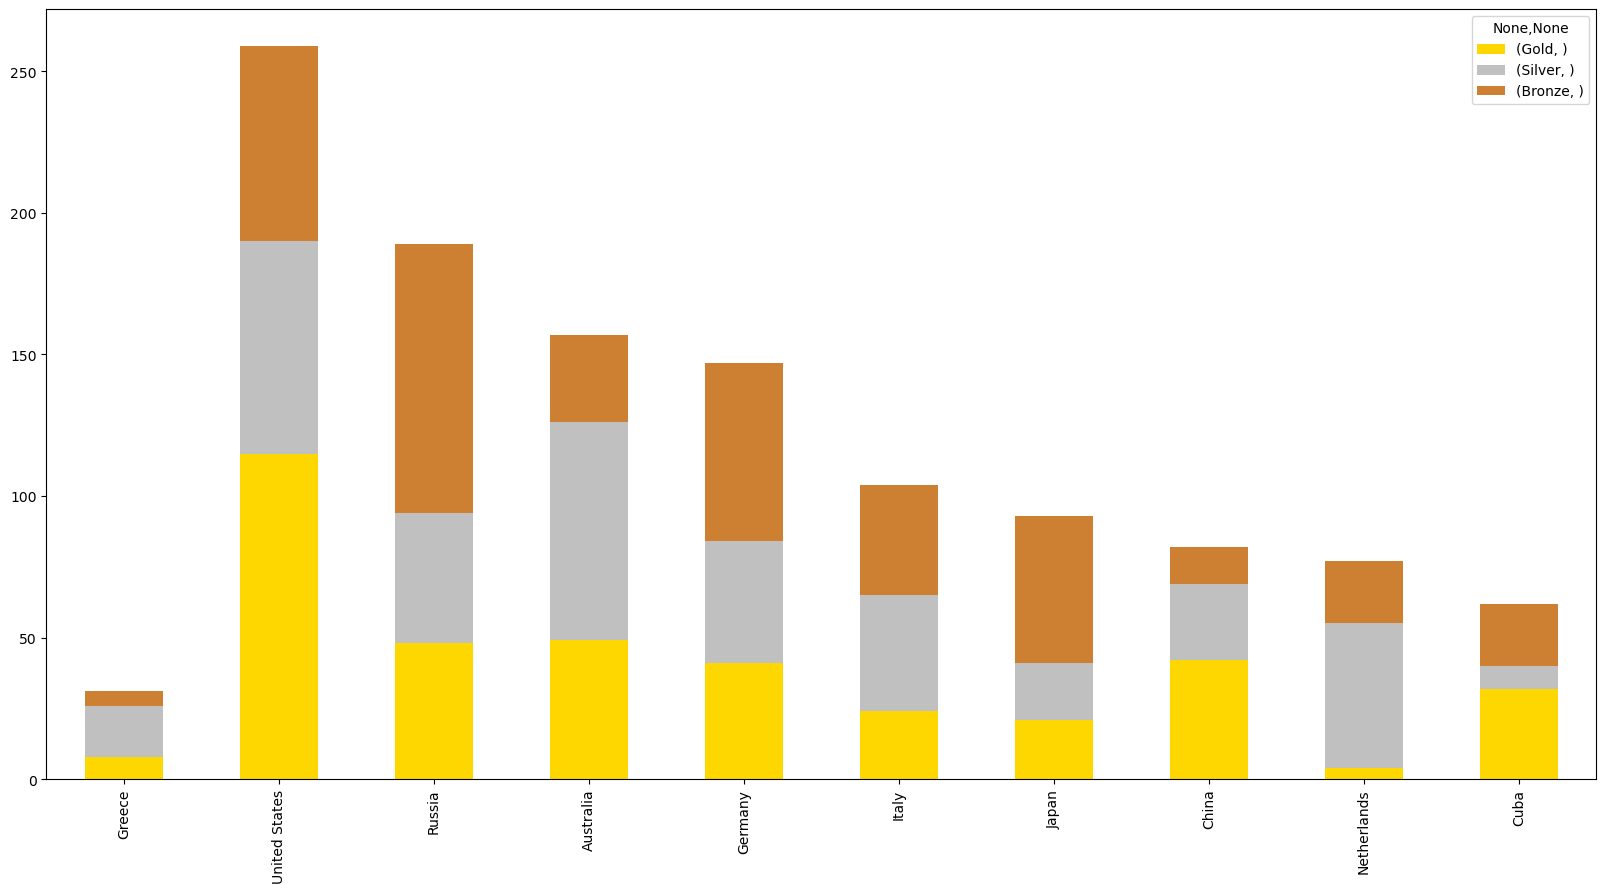

In [16]:
# Use a line chart to plot the medal count for the Chinese team in the Summer Olympics.
host_year_sorted.head(10)[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, color=['#ffd700', '#c0c0c0', '#cd7f32'], figsize=(20, 10))


** Normalizing the Team Sport Medal Counts **

In [17]:
#View all the values in the Sport column
summer_games_df['Event'].unique()

array(["Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Athletics Women's Javelin Throw",
       "Canoeing Men's Kayak Fours, 1,000 metres",
       "Fencing Men's epee, Individual", "Football Men's Football",
       "Wrestling Men's Featherweight, Freestyle",
       "Cycling Women's Sprint", "Cycling Women's 500 metres Time Trial",
       "Handball Men's Handball", "Athletics Women's Marathon",
       "Athletics Men's 100 metres",
       "Swimming Men's 100 metres Freestyle",
       "Weightlifting Men's Middleweight", "Hockey Men's Hockey",
       "Taekwondo Women's Featherweight",
       "Synchronized Swimming Women's Duet",
       "Water Polo Men's Water Polo", "Fencing Men's epee, Team",
       "Shooting Women's Air Rifle, 10 metres",
       "Shooting Men's Air Rifle, 10 metres",
       "Athletics Men's 10,000 metres",
       "Wrestling Men's Middleweight, Freestyle",
       "Modern Pentathlon Men's Individual",
       "Weightlifting Women's Lightweight", "Rowing Men's Doub

In [18]:
#Combine values in the Event column into a single row by Country (Exmample all 'Football Men's Football' should be on the same row for each country)
combined_events_df = summer_games_df.dropna(subset = ["Medal"]) 

combined_events_df


,Country,Games,Year,Season,Sport,Event,Medal,Host
186,United States,2004 Summer,2004,Summer,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,Athina
195,Russia,2004 Summer,2004,Summer,Cycling,Cycling Women's Sprint,Silver,Athina
311,United States,2004 Summer,2004,Summer,Taekwondo,Taekwondo Women's Featherweight,Silver,Athina
903,Sweden,2004 Summer,2004,Summer,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",Silver,Athina
966,Russia,2004 Summer,2004,Summer,Volleyball,Volleyball Men's Volleyball,Bronze,Athina
...,...,...,...,...,...,...,...,...
270931,Belarus,2004 Summer,2004,Summer,Boxing,Boxing Men's Heavyweight,Silver,Athina
270981,Georgia,2004 Summer,2004,Summer,Judo,Judo Men's Middleweight,Gold,Athina
271009,Germany,2004 Summer,2004,Summer,Hockey,Hockey Women's Hockey,Gold,Athina
271013,Netherlands,2004 Summer,2004,Summer,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Silver,Athina


In [19]:
combined_events_df = combined_events_df.groupby(['Country', 'Year', 'Season', 'Sport', 'Medal', 'Host'])['Event'].apply(', '.join).reset_index()

combined_events_df.tail(25)

,Country,Year,Season,Sport,Medal,Host,Event
579,United States,2004,Summer,Shooting,Gold,Athina,"Shooting Men's Small-Bore Rifle, Prone, 50 met..."
580,United States,2004,Summer,Shooting,Silver,Athina,"Shooting Men's Small-Bore Rifle, Three Positio..."
581,United States,2004,Summer,Softball,Gold,Athina,"Softball Women's Softball, Softball Women's So..."
582,United States,2004,Summer,Swimming,Bronze,Athina,"Swimming Women's 100 metres Freestyle, Swimmin..."
583,United States,2004,Summer,Swimming,Gold,Athina,"Swimming Women's 200 metres Breaststroke, Swim..."
584,United States,2004,Summer,Swimming,Silver,Athina,"Swimming Women's 200 metres Individual Medley,..."
585,United States,2004,Summer,Synchronized Swimming,Bronze,Athina,"Synchronized Swimming Women's Duet, Synchroniz..."
586,United States,2004,Summer,Taekwondo,Gold,Athina,Taekwondo Men's Welterweight
587,United States,2004,Summer,Taekwondo,Silver,Athina,Taekwondo Women's Featherweight
588,United States,2004,Summer,Tennis,Silver,Athina,Tennis Men's Singles
